In [1]:
# Libraries for data loading, data viz and EDA
import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries for text preprocessing and analysis
import re,nltk,spacy,string
nlp=spacy.load("en_core_web_sm")
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Libraries for model evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# row/column display limit
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_excel('cisco_from_db.xlsx')

In [3]:
df.head()

,incident_number,uncleaned_description,cleaned_description,cluster_number,predicted_tag,userdefined_tag,score
0,INC2617296,Channel Overlay Debooking of Mio against NTT Germany needs to be corrected,channel overlay debooking against ntt germany needs to corrected,NaN,report_requests,NaN,49
1,INC2617297,Error Image Pull Back off Issue for Prod deployment,error image pull back off issue prod deployment,NaN,deployment_related,NaN,100
2,INC2617298,Gate Failed error for deployment,gate failed error deployment,NaN,deployment_related,deployment_related,100
3,INC2617309,Hi Team Please note that Quote is in conversion failed status However there is no hold on SO Kindly provide us workaround and reply at the earliest Regards Imran S,hi team please note quote in conversion failed status however no hold on so provide us workaround reply earliest regards imran s,NaN,storage_related,NaN,89
4,INC2617312,Aurora Development Service ADS My system is down or something is broken Please help Enter Hostname bgl ads Please enter a detailed problem descriptio,aurora development service ads system down something broken please help enter hostname enter detailed problem descriptio,NaN,Infra_related_ads,Infra_related_ads,100


In [4]:
df.shape

(41917, 7)

In [5]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_texts(text):
    #Make the text lowercase
    text=text.lower()
    
    #Remove text in square brackets
    text=re.sub(r'\[.*?\]','',text)
    
    #Remove punctuation
    text=re.sub(r'[%s]%re.escape(string.punctuation)','',text)
    
    #Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    return text

In [6]:
df = df[df['uncleaned_description'].notna()]

In [7]:
#Cleaning df['complaint_what_happened']
df['cleansed_description']= df['uncleaned_description'].apply(lambda x: clean_texts(x))

In [8]:
df.head()

,incident_number,uncleaned_description,cleaned_description,cluster_number,predicted_tag,userdefined_tag,score,cleansed_description
0,INC2617296,Channel Overlay Debooking of Mio against NTT Germany needs to be corrected,channel overlay debooking against ntt germany needs to corrected,NaN,report_requests,NaN,49,channel overlay debooking of mio against ntt germany needs to be corrected
1,INC2617297,Error Image Pull Back off Issue for Prod deployment,error image pull back off issue prod deployment,NaN,deployment_related,NaN,100,error image pull back off issue for prod deployment
2,INC2617298,Gate Failed error for deployment,gate failed error deployment,NaN,deployment_related,deployment_related,100,gate failed error for deployment
3,INC2617309,Hi Team Please note that Quote is in conversion failed status However there is no hold on SO Kindly provide us workaround and reply at the earliest Regards Imran S,hi team please note quote in conversion failed status however no hold on so provide us workaround reply earliest regards imran s,NaN,storage_related,NaN,89,hi team please note that quote is in conversion failed status however there is no hold on so kindly provide us workaround and reply at the earliest regards imran s
4,INC2617312,Aurora Development Service ADS My system is down or something is broken Please help Enter Hostname bgl ads Please enter a detailed problem descriptio,aurora development service ads system down something broken please help enter hostname enter detailed problem descriptio,NaN,Infra_related_ads,Infra_related_ads,100,aurora development service ads my system is down or something is broken please help enter hostname bgl ads please enter a detailed problem descriptio


In [9]:
#Write your function to Lemmatize the texts
def lemma_texts(text):     
        
    # Initialize empty list to store lemmas
    lemma_list = []
    
    # Extract lemmas of given text and add to the list 'sent'
    document = nlp(text)
    for word in document:
        lemma_list.append(word.lemma_)
        
    # return string converted form of the list of lemmas
    return " ".join(lemma_list)

In [10]:
tqdm.pandas()

In [11]:
df["lemmatized_descriptipon"] =  df.progress_apply(lambda x: lemma_texts(x['cleansed_description']), axis=1)

# View the dataframe
df.head()

100%|██████████| 41899/41899 [06:11<00:00, 112.65it/s]


,incident_number,uncleaned_description,cleaned_description,cluster_number,predicted_tag,userdefined_tag,score,cleansed_description,lemmatized_descriptipon
0,INC2617296,Channel Overlay Debooking of Mio against NTT Germany needs to be corrected,channel overlay debooking against ntt germany needs to corrected,NaN,report_requests,NaN,49,channel overlay debooking of mio against ntt germany needs to be corrected,channel overlay debooke of mio against ntt germany need to be correct
1,INC2617297,Error Image Pull Back off Issue for Prod deployment,error image pull back off issue prod deployment,NaN,deployment_related,NaN,100,error image pull back off issue for prod deployment,error image pull back off issue for prod deployment
2,INC2617298,Gate Failed error for deployment,gate failed error deployment,NaN,deployment_related,deployment_related,100,gate failed error for deployment,gate fail error for deployment
3,INC2617309,Hi Team Please note that Quote is in conversion failed status However there is no hold on SO Kindly provide us workaround and reply at the earliest Regards Imran S,hi team please note quote in conversion failed status however no hold on so provide us workaround reply earliest regards imran s,NaN,storage_related,NaN,89,hi team please note that quote is in conversion failed status however there is no hold on so kindly provide us workaround and reply at the earliest regards imran s,hi team please note that quote be in conversion fail status however there be no hold on so kindly provide we workaround and reply at the early regard imran s
4,INC2617312,Aurora Development Service ADS My system is down or something is broken Please help Enter Hostname bgl ads Please enter a detailed problem descriptio,aurora development service ads system down something broken please help enter hostname enter detailed problem descriptio,NaN,Infra_related_ads,Infra_related_ads,100,aurora development service ads my system is down or something is broken please help enter hostname bgl ads please enter a detailed problem descriptio,aurora development service ad my system be down or something be break please help enter hostname bgl ad please enter a detailed problem descriptio


In [12]:
df_clean=df[['uncleaned_description','lemmatized_descriptipon']]

In [13]:
df_clean.head()

,uncleaned_description,lemmatized_descriptipon
0,Channel Overlay Debooking of Mio against NTT Germany needs to be corrected,channel overlay debooke of mio against ntt germany need to be correct
1,Error Image Pull Back off Issue for Prod deployment,error image pull back off issue for prod deployment
2,Gate Failed error for deployment,gate fail error for deployment
3,Hi Team Please note that Quote is in conversion failed status However there is no hold on SO Kindly provide us workaround and reply at the earliest Regards Imran S,hi team please note that quote be in conversion fail status however there be no hold on so kindly provide we workaround and reply at the early regard imran s
4,Aurora Development Service ADS My system is down or something is broken Please help Enter Hostname bgl ads Please enter a detailed problem descriptio,aurora development service ad my system be down or something be break please help enter hostname bgl ad please enter a detailed problem descriptio


In [14]:
def singular_nouns(text):
   
    
    # Creating a textblob object
    text_blob = TextBlob(text)
    
    # extracting words with tags 'NN', joining them and return
    return ' '.join([ word for (word,tag) in text_blob.tags if tag == "NN"])

In [15]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\10685702\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\10685702\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\10685702\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\10685702\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\10685702\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\10685702\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is a

In [16]:
df_clean["description_POS_removed"] =  df_clean.progress_apply(lambda x: singular_nouns(x['lemmatized_descriptipon']), axis=1)

# View the dataframe
df_clean.head()

100%|██████████| 41899/41899 [01:09<00:00, 601.05it/s]


,uncleaned_description,lemmatized_descriptipon,description_POS_removed
0,Channel Overlay Debooking of Mio against NTT Germany needs to be corrected,channel overlay debooke of mio against ntt germany need to be correct,debooke mio need
1,Error Image Pull Back off Issue for Prod deployment,error image pull back off issue for prod deployment,error image issue deployment
2,Gate Failed error for deployment,gate fail error for deployment,gate fail error deployment
3,Hi Team Please note that Quote is in conversion failed status However there is no hold on SO Kindly provide us workaround and reply at the earliest Regards Imran S,hi team please note that quote be in conversion fail status however there be no hold on so kindly provide we workaround and reply at the early regard imran s,hi team please note quote conversion fail status hold regard imran s
4,Aurora Development Service ADS My system is down or something is broken Please help Enter Hostname bgl ads Please enter a detailed problem descriptio,aurora development service ad my system be down or something be break please help enter hostname bgl ad please enter a detailed problem descriptio,development service ad system something please help enter hostname bgl ad please problem descriptio


In [17]:
char_len=[len(x) for x in df_clean['description_POS_removed']]
char_len[:10]

[16, 28, 26, 68, 99, 4, 24, 25, 27, 22]

Text(0, 0.5, 'No. of Complaints')

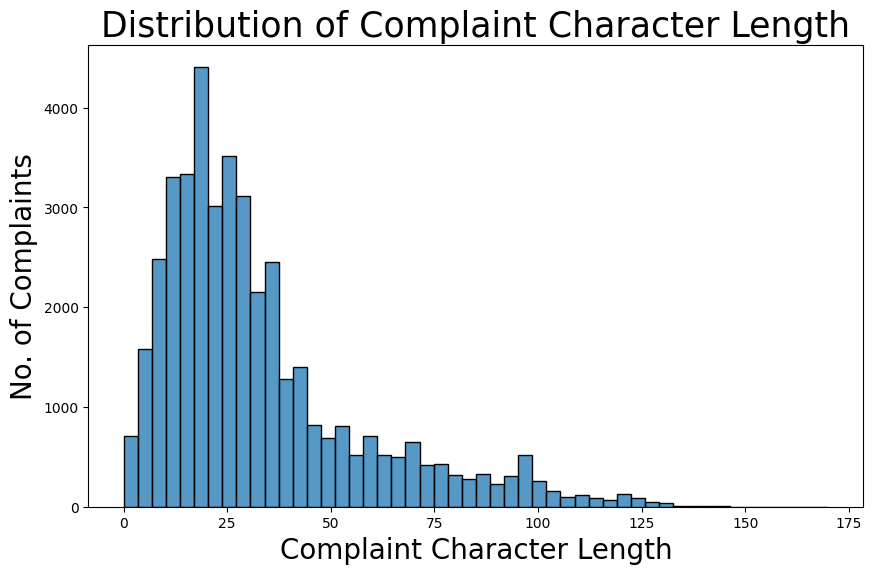

In [18]:
plt.figure(figsize=[10,6])
sns.histplot(data = char_len,bins=50)
plt.title('Distribution of Complaint Character Length', fontsize=25)
plt.xlabel('Complaint Character Length',size=20)
plt.ylabel('No. of Complaints',size=20)

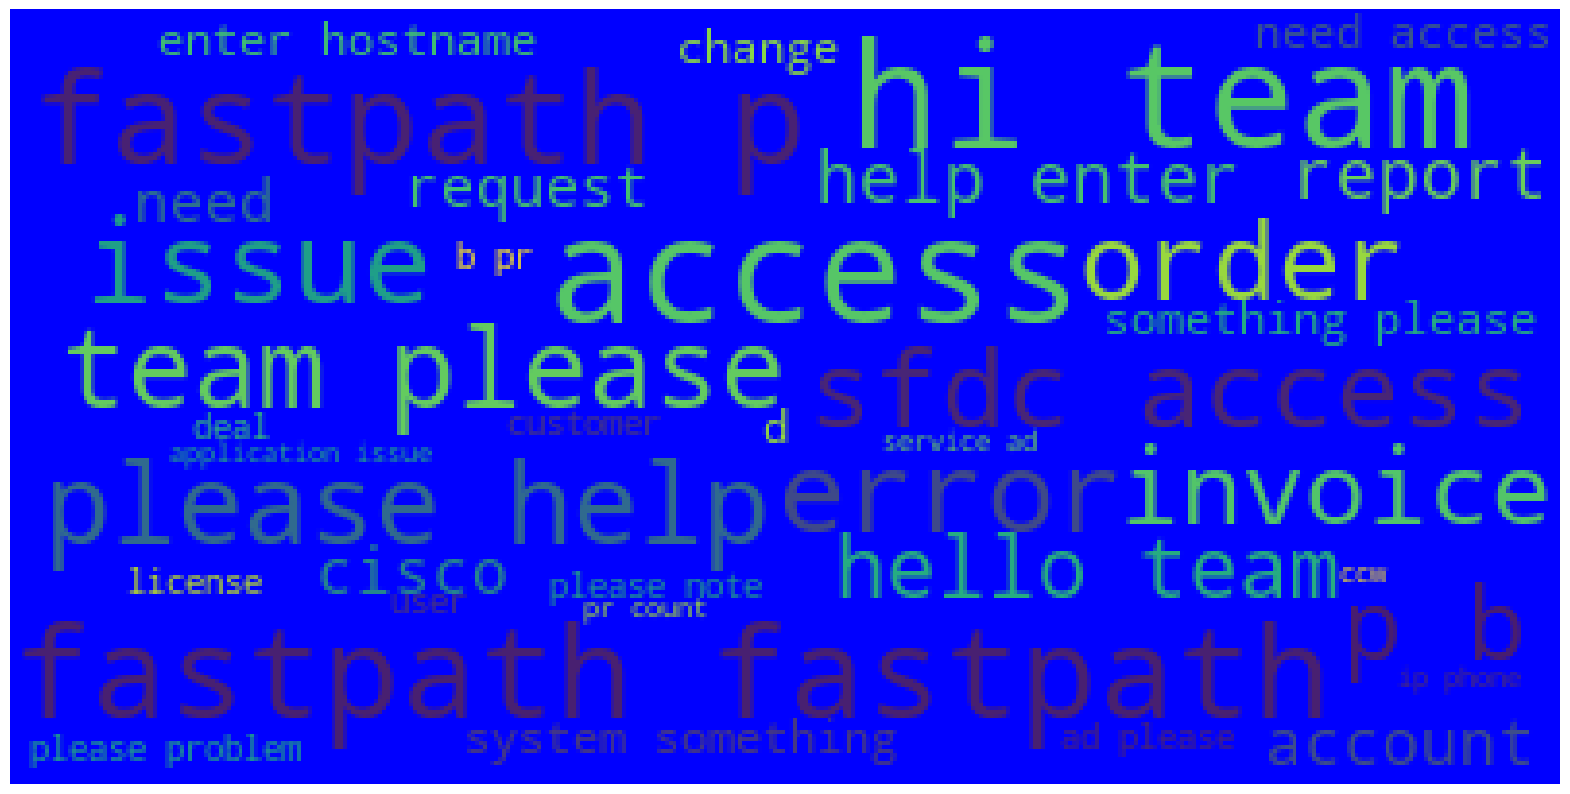

In [19]:
stop_words = set(STOPWORDS)
word_cloud = WordCloud(
                          background_color='blue',
                          stopwords=stop_words,
                          max_font_size=38,
                          max_words=38, 
                          random_state=42
                         ).generate(str(df_clean['description_POS_removed']))

fig = plt.figure(figsize=(20,16))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [20]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 

def get_top_unigram(text, n=30):

    vector = CountVectorizer(stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0) 
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

In [21]:
top_common_words = get_top_unigram(df_clean['description_POS_removed'].values.astype('U'))
df_unigram = pd.DataFrame(top_common_words, columns = ['unigram' , 'count'])
df_unigram.head(10)

,unigram,count
0,access,8177
1,team,4893
2,order,4181
3,issue,3972
4,fastpath,3312
5,hi,2476
6,sfdc,2233
7,error,2101
8,request,2069
9,status,2014


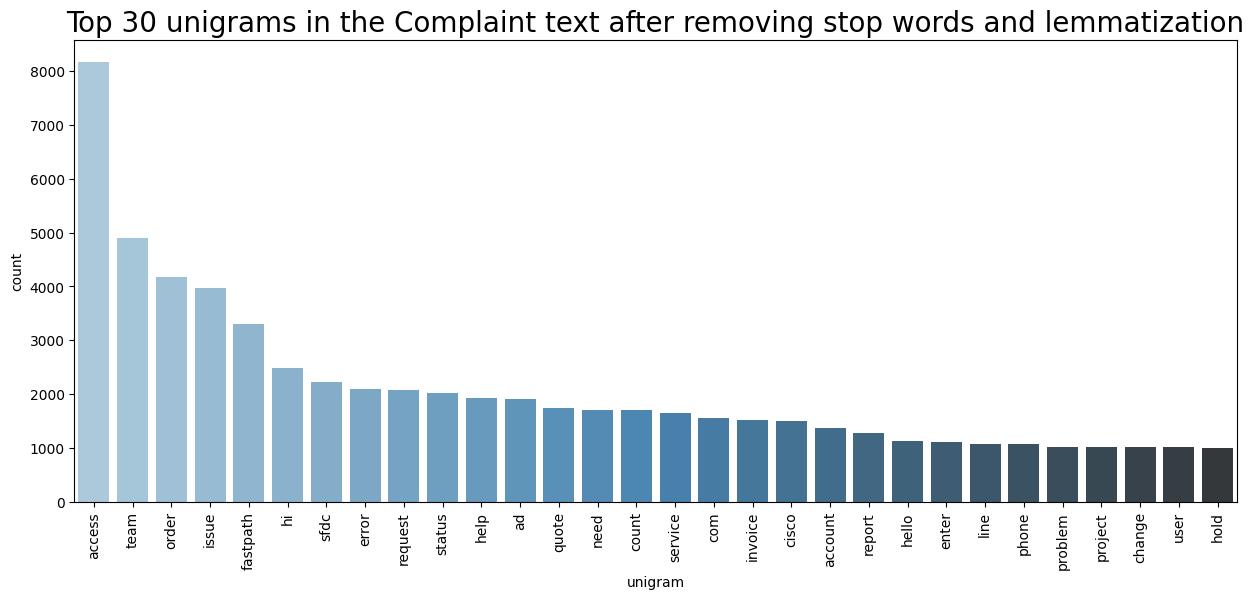

In [22]:
# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='unigram', y='count', data=df_unigram, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 30 unigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

In [23]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_bigram(text, n=30):

    vector = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0) 
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

In [24]:
#Print the top 10 words in the bigram frequency
top_common_words = get_top_bigram(df_clean['description_POS_removed'].values.astype('U'))
df_bigram = pd.DataFrame(top_common_words, columns = ['bigram' , 'count'])
df_bigram.head(10)

,bigram,count
0,hi team,2274
1,fastpath fastpath,1646
2,sfdc access,1134
3,hello team,994
4,help enter,938
5,cisco com,864
6,enter hostname,749
7,need access,650
8,team note,538
9,application issue,523


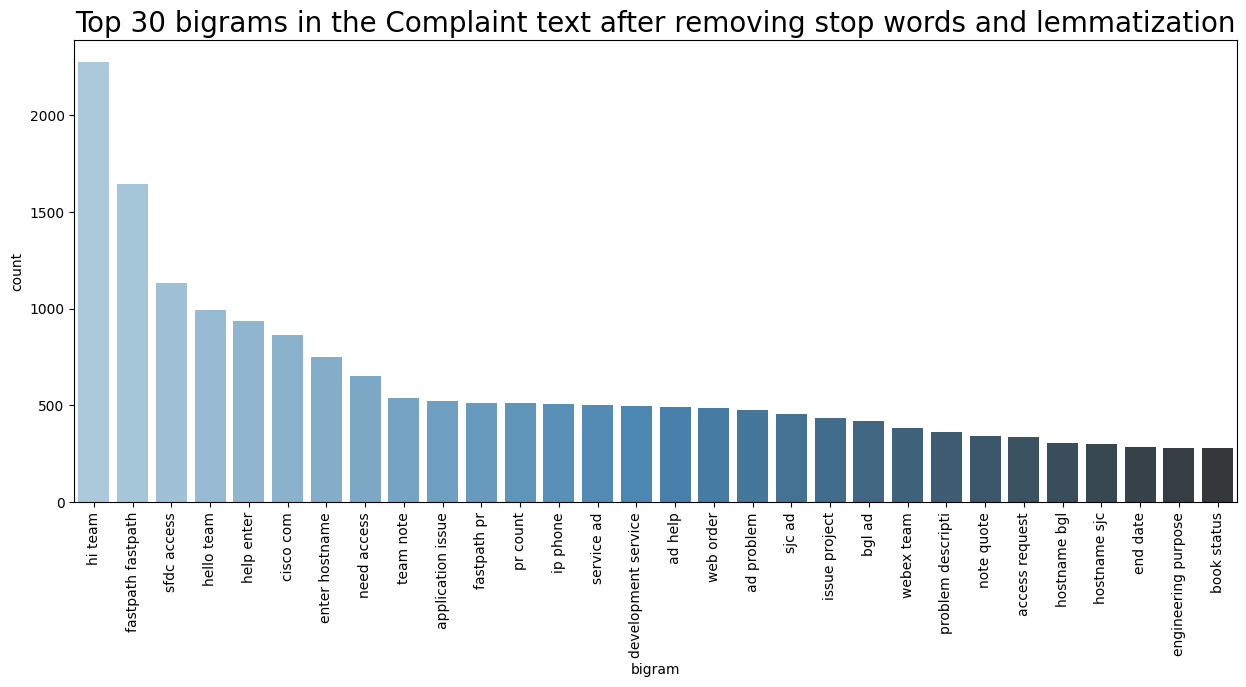

In [25]:
# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='bigram', y='count', data=df_bigram, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 30 bigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

In [26]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_trigram(text, n=30):

    vector = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0) 
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

In [27]:
#Print the top 10 words in the trigram frequency
top_common_words = get_top_trigram(df_clean['description_POS_removed'].values.astype('U'))
df_trigram = pd.DataFrame(top_common_words, columns = ['trigram' , 'count'])
df_trigram.head(10)

,trigram,count
0,help enter hostname,737
1,hi team note,527
2,fastpath fastpath pr,511
3,fastpath pr count,511
4,development service ad,499
5,service ad help,492
6,ad help enter,490
7,application issue project,432
8,ad problem descripti,344
9,team note quote,311


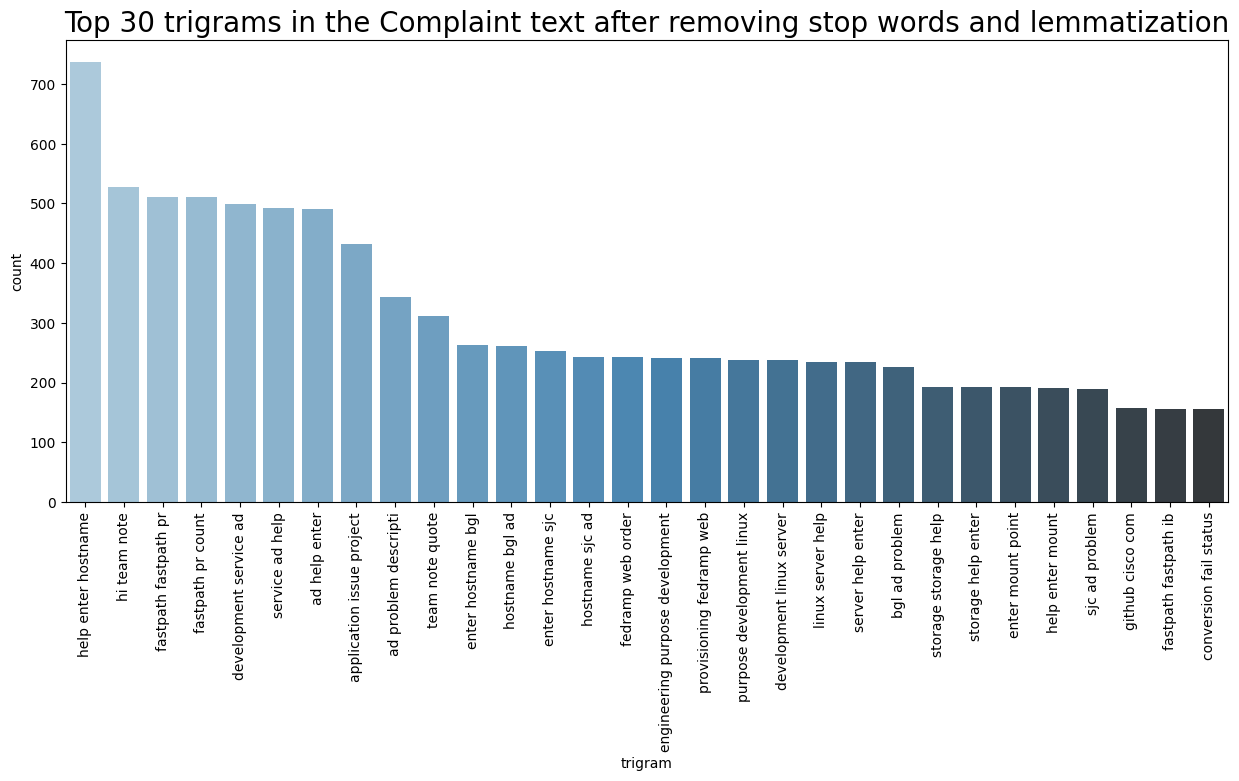

In [28]:
# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='trigram', y='count', data=df_trigram, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 30 trigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

In [29]:
df_cleaner=df_clean.copy()

In [30]:
df_cleaner=df_clean.copy()

In [31]:
#Write your code here to initialise the TfidfVectorizer 

tfidf=TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english', ngram_range=(1,3))

In [32]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm=tfidf.fit_transform(df_clean['description_POS_removed'])

In [33]:
dtm.shape

(41899, 28347)

In [34]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5000, n_iter=7, random_state=42)
svd.fit(dtm)
print(sum(svd.explained_variance_))

0.8062066084641256


In [35]:
svd_dtm = svd.transform(dtm)

In [36]:
svd_dtm.shape

(41899, 5000)

In [37]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import time

In [38]:
from sklearn.cluster import MiniBatchKMeans

In [39]:
distortions = []
silhouette_avg = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 100)

for k in tqdm(K):
    # Building and fitting the model
    mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=k,
    batch_size=600,
    n_init=10,
    max_no_improvement=10,
    verbose=0)
    t0 = time.time()
    mbk.fit(svd_dtm)
    t_mini_batch = time.time() - t0
    if k!=1:
        t1 = time.time()
        silhouette_avg.append(metrics.silhouette_score(svd_dtm, mbk.labels_))
        print(time.time()-t1)
    inertias.append(mbk.inertia_)
    

  2%|▏         | 2/99 [05:41<5:24:03, 200.44s/it]

333.58608627319336


  3%|▎         | 3/99 [11:03<6:49:15, 255.78s/it]

318.74602341651917


  4%|▍         | 4/99 [14:34<6:17:05, 238.16s/it]

207.1220896244049


  5%|▌         | 5/99 [17:50<5:49:32, 223.11s/it]

193.84706711769104


  6%|▌         | 6/99 [21:06<5:31:10, 213.66s/it]

193.28742456436157


  7%|▋         | 7/99 [25:20<5:47:55, 226.91s/it]

252.39331531524658


  8%|▊         | 8/99 [30:34<6:26:18, 254.71s/it]

310.63188910484314


  9%|▉         | 9/99 [34:40<6:17:48, 251.87s/it]

242.11873412132263


In [ ]:
for i in range(1,len(K)):
    print(K[i], inertias[i])
    print(K[i], silhouette_avg[i])

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
plt.plot(K[1:],silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=5, random_state=5).fit(dtm)

In [50]:
kmeans.cluster_centers_.shape

(5, 4912)

In [52]:
cluster_center = tfidf.inverse_transform(kmeans.cluster_centers_)

array(['aa', 'aaccess', 'aaldaych', ..., 'zoom', 'zuora', 'zuroa'],
      dtype='<U26')

In [34]:
from sklearn.decomposition import NMF

In [35]:
#Coherence model to find best number of topics
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
from operator import itemgetter

# Use Gensim's NMF to get the best num of topics via coherence score
texts = df_clean['description_POS_removed']
data_set = [x.split() for x in texts]

# Creating a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(data_set)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)


In [36]:
# Creating the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in data_set]

# Create a list of the topic numbers we want to try
topic_num = list(np.arange(5, 10, 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

In [37]:
print(len(topic_num))

5


In [41]:
topic_num

[5, 6, 7, 8, 9]

In [44]:
for num in tqdm(topic_num):
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=40,
    )
    print("x")
    # Run the coherence model to get the score
    coherence_model = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_uci'
    )
    print("y")
    coherence_scores.append(round(coherence_model.get_coherence(), 5))
    


  0%|                                                     | 0/5 [00:00<?, ?it/s]

x
y


Process AccumulatingWorker-43:
Process AccumulatingWorker-36:
Process AccumulatingWorker-32:
Process AccumulatingWorker-38:
Process AccumulatingWorker-41:
Process AccumulatingWorker-34:
Process AccumulatingWorker-40:
Process AccumulatingWorker-37:
Process AccumulatingWorker-42:
Process AccumulatingWorker-33:
Process AccumulatingWorker-39:
Process AccumulatingWorker-31:
Process AccumulatingWorker-35:
Traceback (most recent call last):
Process AccumulatingWorker-44:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/process.py", line 318, in _bootstrap
    util._exit_function()
Traceback (most recent call last):
Process AccumulatingWorker-45:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/process.py", line 318, in _b

  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/queues.py", line 201, in _finalize_join
    thread.join()
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/queues.py", line 201, in _finalize_join
    thread.join()
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/util.py", line 224, in __cal

KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  0%|                                                     | 0/5 [05:13<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Get the number of topics with the highest coherence score
scores = list(zip(topic_num, coherence_scores))
best_topics_num = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_topics_num)

In [ ]:
df_clean.shape

In [ ]:
# Making a copy of df_clean incase any error occurs
df_cleanx =df_clean.copy()

In [ ]:
#Load your nmf_model with the n_components i.e 5

nmf_model = NMF(n_components=5,random_state=40)

In [ ]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names())

In [ ]:
# Print the top word of a sample component
topic_single = nmf_model.components_[0]
topic_single.argsort()
top_word_index = topic_single.argsort()[-10:]
for index in top_word_index:
    print(tfidf.get_feature_names()[index])

In [ ]:
#Print the Top15 words for each of the topics
for index, topic in enumerate(nmf_model.components_):
    print(f'TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

In [ ]:
# Create a new 'Topic' column and assign the best topic to each of the complaints

df_clean['Topic'] = topic_result.argmax(axis=1)

In [ ]:
df_clean.shape

In [ ]:
df_clean.head()

In [ ]:
#Print the first 5 Complaint for each of the Topics
df_clean_5=df_clean.groupby('Topic').head(5)
df_clean_5.sort_values('Topic')